In [1]:
from ..assets.NetworkResilience import*

# 1.1 get the data from orginal data

In [2]:
path = '../../data/Railway Data_JL.xlsx'

In [3]:
G,feature,edge = get_graph_path(path)

G:\Cranfield\Applications_in_Practical_High-End_Computing (A)\code\Network_Resilience\NetworkResilience.py:56: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  edge_index = torch.tensor([df_test_edge['start'].values,df_test_edge['end'].values], dtype=torch.long)


In [14]:
# save as the RL need
feature.to_csv('dataset1_df_nodes.csv',index=False)
edge.to_csv('dataset1_df_edges.csv',index=False)

# 1.2 read the data from csv

In [2]:
df_node = pd.read_csv('dataset1_df_nodes.csv')
df_edge = pd.read_csv('dataset1_df_edges.csv')

In [3]:
G,df_node, df_edge = get_graph(df_node,df_edge)

G:\Cranfield\Applications_in_Practical_High-End_Computing (A)\code\Network_Resilience\NetworkResilience.py:56: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  edge_index = torch.tensor([df_test_edge['start'].values,df_test_edge['end'].values], dtype=torch.long)


# 4 get the node feature /the dataframe is also for GCN feature

In [4]:
df_node = get_node_properties(G,df_node)

In [5]:
df_node

,node,lat,lon,degree,K_core,clustering,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
0,0,28.888580,104.688450,2,2,0.0,0.000736,1.156310e-03,0.109544,0.000003
1,1,44.003190,125.357700,2,2,1.0,0.000736,0.000000e+00,0.149250,0.008866
2,2,45.062360,128.080750,6,5,0.8,0.002208,2.976263e-06,0.133720,0.006648
3,3,40.348790,124.097540,3,3,1.0,0.001104,0.000000e+00,0.117074,0.000464
4,4,45.811640,130.903210,2,2,1.0,0.000736,0.000000e+00,0.106392,0.000019
...,...,...,...,...,...,...,...,...,...,...
2714,2714,40.212193,124.364699,2,2,1.0,0.000736,0.000000e+00,0.104821,0.000071
2715,2715,42.726147,120.535412,2,2,0.0,0.000736,6.555519e-04,0.097186,0.000005
2716,2716,41.394530,123.984735,2,2,0.0,0.000736,3.676468e-04,0.116838,0.000259
2717,2717,26.083386,107.823667,5,4,0.2,0.001840,2.290438e-04,0.116114,0.000037


# 5 get the edge and node /the dataframe is also for GCN feature

In [6]:
df_node.to_csv('dataset1_RL_nodes.csv',index=False)
df_edge.to_csv('dataset1_RL_edges.csv',index=False)

In [22]:
num_nodes, num_edges, num_connected_components, Max_components_node, Max_components_edges, k_cores, density, diameter, avg_distance, efficiency = get_network_properties(G)

In [25]:
# print for yuqing to use
#######################################33
print('node number：', num_nodes)
print('edge number：', num_edges)
print('The number of connected graphs:', num_connected_components)
print('The number of nodes of the largest connected component：', Max_components_node)
print('The number of edges of the largest connected component：', Max_components_edges)
print('The k-core of the largest connected component：', k_cores)
print('The network density of the largest connected component：', density)
print('Diameter of the largest connected component：', diameter)
print('Average distance of the largest connected component：', avg_distance)
print('The efficiency of the largest connected component：', efficiency)


node number： 2719
edge number： 6168
The number of connected graphs: 1
The number of nodes of the largest connected component： 2719
The number of edges of the largest connected component： 6168
The k-core of the largest connected component： Graph with 14 nodes and 64 edges
The network density of the largest connected component： 0.0016692281524745738
Diameter of the largest connected component： 47
Average distance of the largest connected component： 8.789288902853249
The efficiency of the largest connected component： 0.13798191658642248


### Network attact Visualization

In [26]:
Attack_Ratio, relative_size, relative_size_deg, relative_size_betw, relative_size_kshell, relative_size_ci = plot_attack(G)

In [47]:
#save csv
save = pd.DataFrame({'Attack_Ratio':Attack_Ratio,'relative_size': relative_size, 'relative_size_deg': relative_size_deg, 'relative_size_betw': relative_size_betw,'relative_size_kshell': relative_size_kshell,'relative_size_ci': relative_size_ci})
save.to_csv('data1attack.csv',index=False)

In [31]:
Attack_Ratio = Attack_Ratio.tolist()

In [48]:
import json
data = {"Attack_Ratio":Attack_Ratio,"relative_size": relative_size, "relative_size_deg": relative_size_deg, "relative_size_betw": relative_size_betw,"relative_size_kshell": relative_size_kshell,"relative_size_ci": relative_size_ci}

with open('data1attack.json', 'w') as f:
    json.dump(data, f)

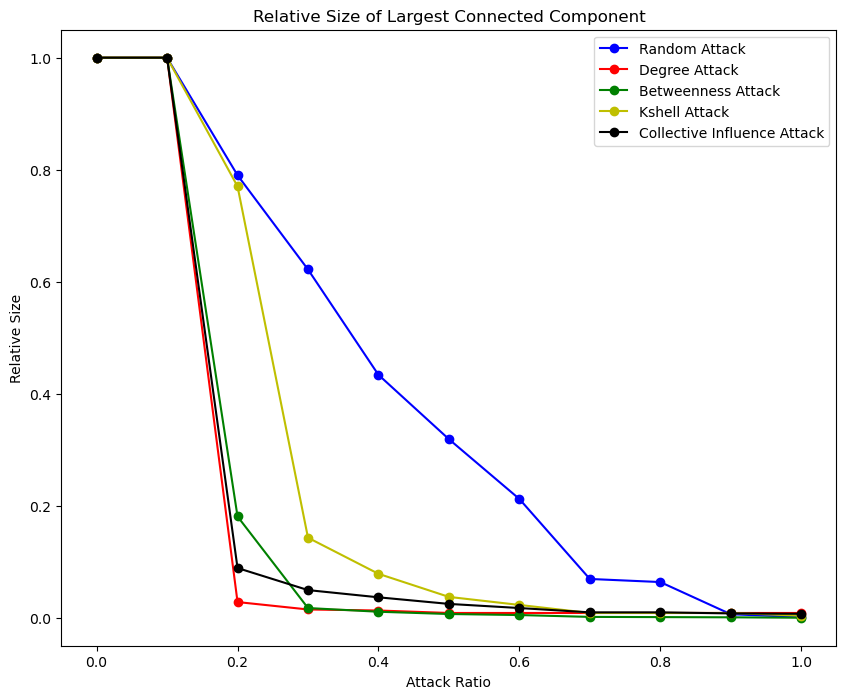

In [33]:
plt.figure(figsize=(10, 8))
plt.plot(Attack_Ratio, relative_size, 'bo-', label='Random Attack')
plt.plot(Attack_Ratio, relative_size_deg, 'ro-', label='Degree Attack')
plt.plot(Attack_Ratio, relative_size_betw, 'go-', label='Betweenness Attack')
plt.plot(Attack_Ratio, relative_size_kshell, 'yo-', label='Kshell Attack')
plt.plot(Attack_Ratio, relative_size_ci, 'ko-', label='Collective Influence Attack')
plt.title("Relative Size of Largest Connected Component")
plt.ylabel("Relative Size")
plt.xlabel("Attack Ratio")
plt.legend()
plt.show()

### Degree-Count Relationship

In [34]:
degree_list, count_list = plot_degrees(G)

In [49]:
data = {"degree_list":degree_list,"count_list": count_list}
with open('data1Degree_Count.json', 'w') as f:
    json.dump(data, f)

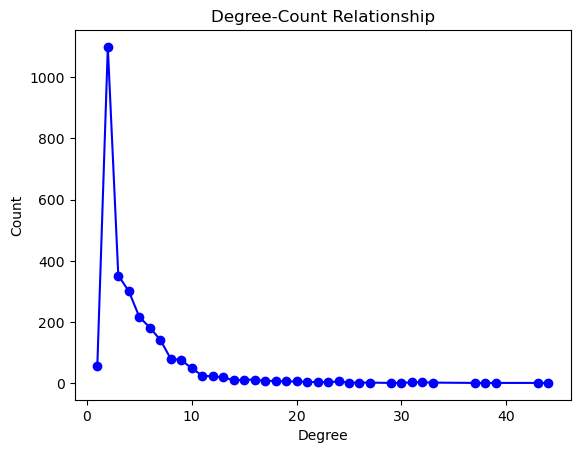

In [36]:
plt.plot(degree_list, count_list, 'bo-')
plt.title("Degree-Count Relationship")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

### Degree Distribution

In [37]:
degree_count,degree_distribution = plot_Degree_Distribution(G)

In [43]:
degree_count = list(degree_count)

In [45]:
data = {"degree_count":degree_count,"degree_distribution": degree_distribution}
with open('data1Degree_Distribution.json', 'w') as f:
    json.dump(data, f)

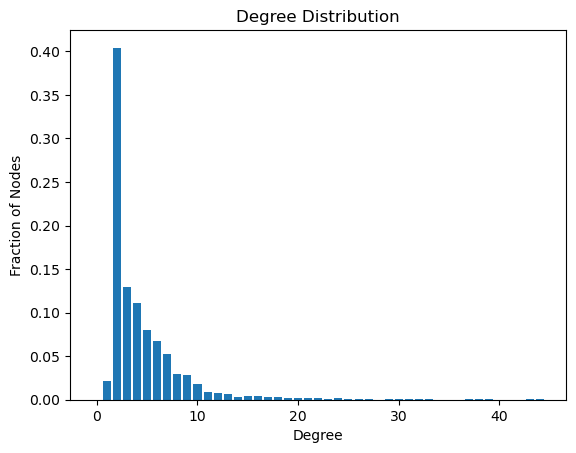

In [44]:
plt.bar(degree_count, degree_distribution)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.show()

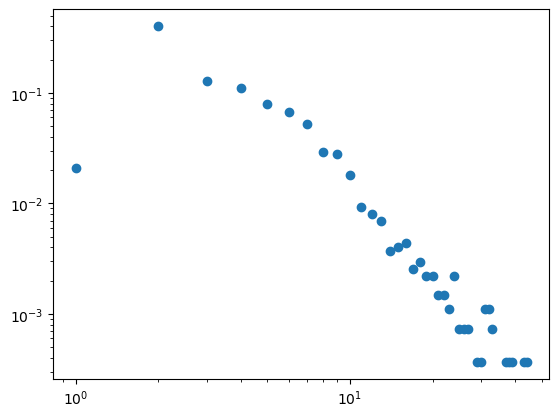

In [46]:
plt.scatter(degree_count, degree_distribution)
# 将横坐标和纵坐标设置为对数比例
plt.xscale('log')
plt.yscale('log')

In [7]:
df = delete_node(G,854)

In [8]:
df

,G_before,G_after
Number of Nodes,2719,2718
Number of Edges,6168,6162
Number of Connected Components,1,2
Size of Largest Connected Component,2719,2712
Number of Edges in Largest Connected Component,6168,6156
K-Cores,"(1696, 834, 2050, 1765, 2150, 81, 1938, 531, 1...","(1696, 834, 2050, 1765, 2150, 81, 1938, 531, 1..."
Density,0.001669,0.001675
Diameter,47,47
Average Distance,8.789289,8.791531
Efficiency,0.137982,0.138006


In [37]:
k_cores = max(nx.core_number(G).values())

In [39]:
corr_coef = nx.degree_pearson_correlation_coefficient(G)


In [40]:
corr_coef

0.20506943713076714